# Filtering
This exercise is about understanding how filters can be applied to modify, or extract specific features from images.

<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#pixel_shift1">Task 1: Shifting pixels</a>
            </li>
            <li>
            <a href="#gaussian">Task 2: Gaussian blurring</a>
            </li>
            <li>
            <a href="#template_match">Task 3: Template matching</a>
            </li>
            <li>
            <a href="#sharp">Task 4: Sharpening</a>
            </li>
            <li>
            <a href="#gradient_features0">Task 5: Apply sobel filters</a>
            </li>
            <li>
            <a href="#gradient_features">Task 6: Implementing convolution</a>
            </li>
        </ul>
    </div>
</article>

Run the following cell to import the libraries:


In [1]:
import numpy as np
from skimage import data, color
from scipy.ndimage import convolve, correlate
from skimage import feature, transform, io
import matplotlib.pyplot as plt

The same set of example images from the Scikit-Image library used in the tutorial will be used. The code below can be used or modified to load and inspect any of the images.


['astronaut', 'binary_blobs', 'brain', 'brick', 'camera', 'cat', 'cell', 'cells3d', 'checkerboard', 'chelsea', 'clock', 'coffee', 'coins', 'colorwheel', 'data_dir', 'download_all', 'eagle', 'file_hash', 'grass', 'gravel', 'horse', 'hubble_deep_field', 'human_mitosis', 'immunohistochemistry', 'kidney', 'lbp_frontal_face_cascade_filename', 'lfw_subset', 'lily', 'logo', 'microaneurysms', 'moon', 'nickel_solidification', 'page', 'palisades_of_vogt', 'protein_transport', 'retina', 'rocket', 'shepp_logan_phantom', 'skin', 'stereo_motorcycle', 'text', 'vortex']


(np.float64(-0.5), np.float64(383.5), np.float64(302.5), np.float64(-0.5))

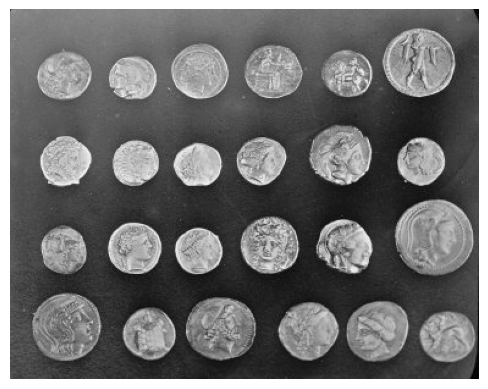

In [3]:
print(data.__all__)
plt.imshow(data.coins(), cmap="gray")
plt.axis(False)


---
**Task 1 (easy): Shifting pixels👩‍💻♾️**
This exercise is about understanding the fundamentals of linear filters to shift pixels in a certain direction. The actual filter may have little practical relevance. 
1. Construct a filter that shifts pixels of an image by $n$ pixels to the right. Create a function with parameter `n`
 that returns a filter that shifts the pixels of an image by `n`
 pixels to the right.
2. Apply the filter (convolution) to one of the example images and show the results. Experiment with different values for `n`
.
3. Create the functions `shift_to_left`
, `shift_to_up`
, and `shift_to_down`
 to shift the input images $n$ pixels to the left, up and down. Use one of the example images to test these functions and evaluate whether the images are correctly shifted. 
4. Modify the filter to not only shift the pixel to the right (or the other directions) but also decreases its brightness.


---

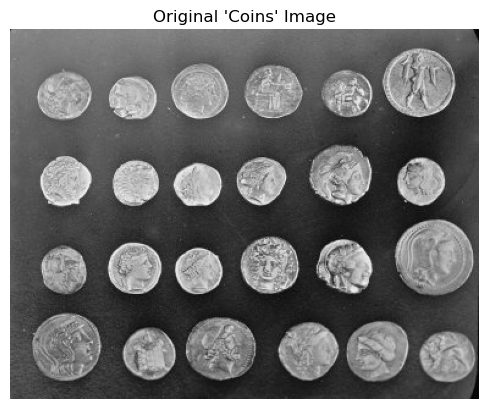

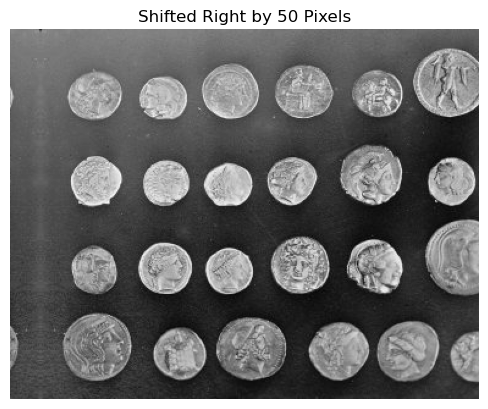

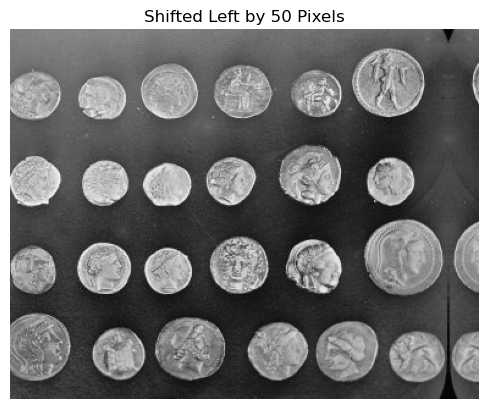

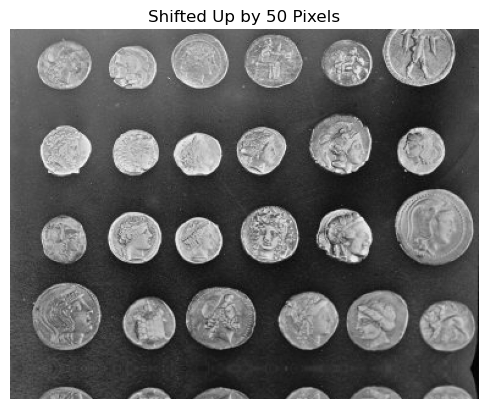

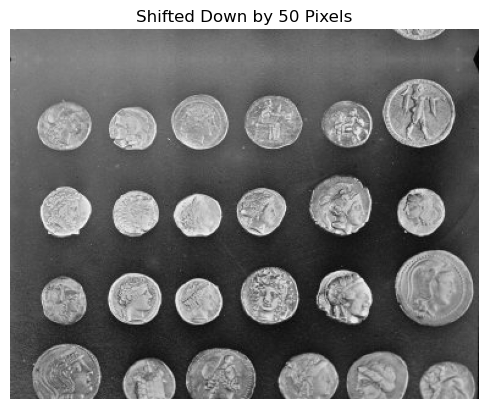

In [4]:
# Function to shift an image to the right
def shift_to_right(n):
    """
    Param n: number of pixels to shift to the right.

    Returns: filter for shifting.
    """
    # A kernel (filter) of size 1 x (n + 1) filled with zeros
    #example of 1 x (n+1), with n = 2
    # [[0, 0, 0]]
    kernel = np.zeros((1, n + 1))
    
    # Set the value at index n of the first row to 1
    # [[0, 0, 1]]
    kernel[0, n] = 1
    
    #This works, because we take current pixel top left and value it 0, then next pixel and value it 0, and then our n=2 pixel and value it 1.
    #This means that the topleft pixel will be replaced by pixel at n=2, which is the third pixel to the right.
    return kernel

# Function to shift an image to the left
def shift_to_left(n):
    """
    Param n: number of pixels to shift to the left.

    Returns: filter for shifting.
    """
    kernel = np.zeros((1, n + 1))
    kernel[0, 0] = 1
    return kernel

# Function to shift an image upwards
def shift_to_up(n):
    """
    Param n: number of pixels to shift up.

    Returns: filter for shifting.
    """
    kernel = np.zeros((n + 1, 1))
    kernel[0, 0] = 1
    return kernel

# Function to shift an image downwards
def shift_to_down(n):
    """
    Param n: number of pixels to shift down.

    Returns: filter for shifting.
    """
    kernel = np.zeros((n + 1, 1))
    kernel[n, 0] = 1
    return kernel

# Function to apply shift filter and reduce brightness
def apply_shift_filter(image, filter_kernel, brightness_factor=0.9):
    """
    Apply the given filter to the image using 2D convolution and reduce brightness.
    
    Param image: 2D array representing the image.
    Param filter_kernel: 2D filter (kernel) to be applied.
    Param brightness_factor: factor by which to reduce brightness.
    
    Returns: Image after applying the filter and reducing brightness.
    """
    shifted_image = convolve(image, filter_kernel)
    # Reduce brightness by multiplying the image by brightness factor
    return shifted_image * brightness_factor

#Coins as example image
coins_image = data.coins()

# Display original image
plt.imshow(coins_image, cmap="gray")
plt.axis(False)
plt.title("Original 'Coins' Image")
plt.show()

# Apply right shift by 50 pixels and brightness reduction
shift_kernel_right = shift_to_right(50)
shifted_coins_right = apply_shift_filter(coins_image, shift_kernel_right)

# Display the shifted right image
plt.imshow(shifted_coins_right, cmap="gray")
plt.axis(False)
plt.title("Shifted Right by 50 Pixels")
plt.show()

# Similarly, you can shift the image in other directions:
# Shift left by 50 pixels
shift_kernel_left = shift_to_left(50)
shifted_coins_left = apply_shift_filter(coins_image, shift_kernel_left)
plt.imshow(shifted_coins_left, cmap="gray")
plt.axis(False)
plt.title("Shifted Left by 50 Pixels")
plt.show()

# Shift up by 50 pixels
shift_kernel_up = shift_to_up(50)
shifted_coins_up = apply_shift_filter(coins_image, shift_kernel_up)
plt.imshow(shifted_coins_up, cmap="gray")
plt.axis(False)
plt.title("Shifted Up by 50 Pixels")
plt.show()

# Shift down by 50 pixels
shift_kernel_down = shift_to_down(50)
shifted_coins_down = apply_shift_filter(coins_image, shift_kernel_down)
plt.imshow(shifted_coins_down, cmap="gray")
plt.axis(False)
plt.title("Shifted Down by 50 Pixels")
plt.show()


---
**Task 2 (medium): Gaussian blurring👩‍💻**
The following steps will construct a Gaussian filter and apply it to an image:
1. Design a 3x3 filter for Gaussian blurring. Each element of the filter should be filled with values that approximate a Gaussian function.


**Hint**
The filter was covered during the lecture.

2. Display the Gaussian Blur filter using the cell below.
3. Apply the filter to one of the example images and display the original and blurred images side by side.
4. Explain the underlying reasons for the observed effects produced by this filter.
5. Increase the size of the Gaussian blurring filter (shown below). Apply the filter to the selected image and compare the results to the results obtained in the previous steps. Explain the observed effects. 


$$
\begin{equation}
\frac{1}{256}
\begin{bmatrix}
1 & 4 & 6 & 4 & 1 \\
4 & 16 & 24 & 16 & 4 \\
6 & 24 & 36 & 24 & 6 \\
4 & 16 & 24 & 16 & 4 \\
1 & 4 & 6 & 4 & 1 \\
\end{bmatrix}
\end{equation}
$$

---

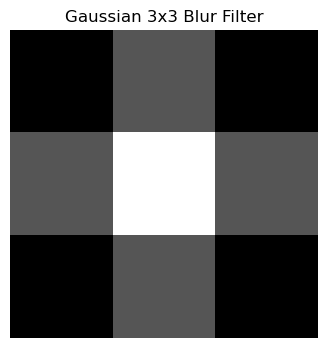

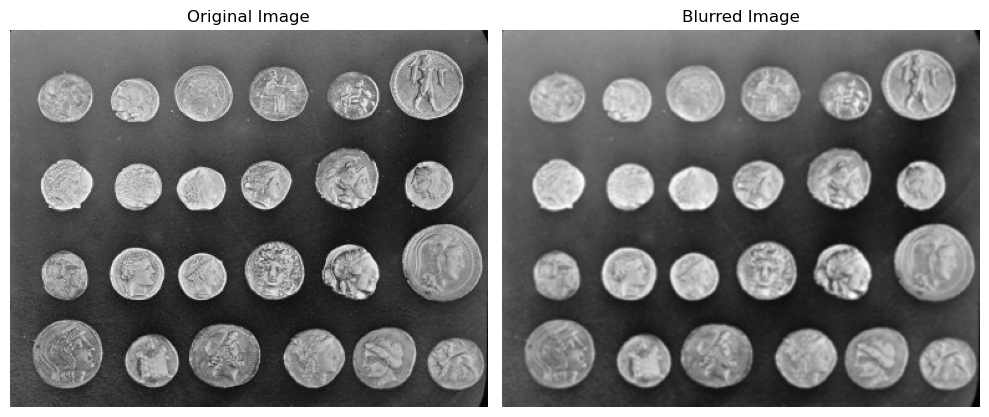

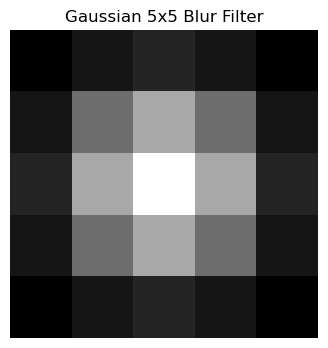

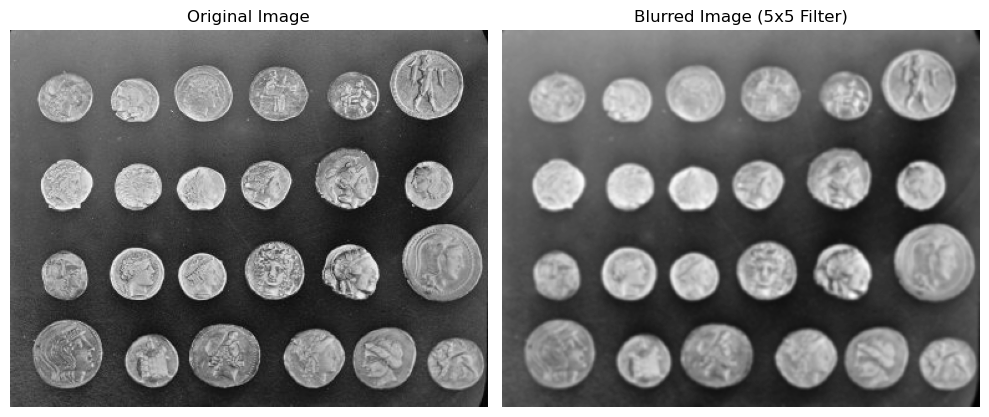

: 

In [ ]:
# write your solution here

#Coins as example image
image = data.coins()

gaussian_blur_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16

# Apply the Gaussian blur filter using scipy's convolve
blurred_image = convolve(image, gaussian_blur_filter)

# Plot the Gaussian Blur Filter
plt.figure(figsize=(4, 4))
plt.title('Gaussian 3x3 Blur Filter')
plt.imshow(gaussian_blur_filter, cmap='gray')
plt.axis('off')
plt.show()

# Plot the original and the blurred image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Blurred Image')
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


gaussian_blur_filter_5x5 = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) / 256

# Apply the larger Gaussian blur filter using scipy's convolve
blurred_image_5x5 = convolve(image, gaussian_blur_filter_5x5)

# Plot the Gaussian Blur Filter
plt.figure(figsize=(4, 4))
plt.title('Gaussian 5x5 Blur Filter')
plt.imshow(gaussian_blur_filter_5x5, cmap='gray')
plt.axis('off')
plt.show()

# Plot the original and the larger blurred image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Blurred Image (5x5 Filter)')
plt.imshow(blurred_image_5x5, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


---
**Task 3 (medium): Template matching👩‍💻**
The following exercise is about implementing template matching on the sunflower image (`sunflowers.jpg`
) found in the data library for this week's exercises.
1. Run the cell below to load the image, convert it to grayscale and normalize its pixel values. 
2. Define a rectangular region of interest (ROI) within the image. This ROI will serve as the template you want to extract from the image and it should include the flower head of a single sunflower. Extract the template and display it.
3. Implement template matching by using the [`skimage.feature.match_template`
](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_template.html)
 function. The function returns a two-dimensional array (correlation map) that indicate the similarity or correlation between the template and regions of the input image. Display the results.
4. Was the template correctly matched to the original image? Were there any other areas that appeared to be potential matches?
5. (Optional) Repeat the steps above using convolution. What differences and similarities do you observe and why? Does it change if you normalize the filters or the image (or both) prior to convolution?


---

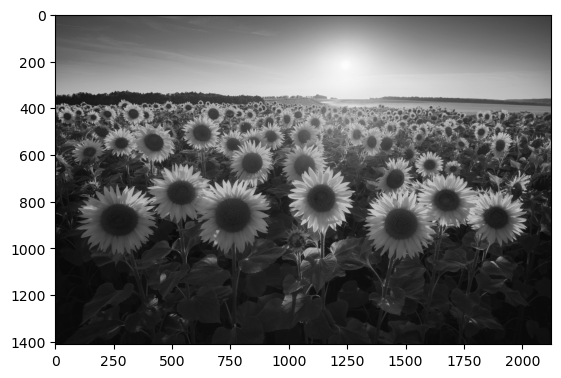

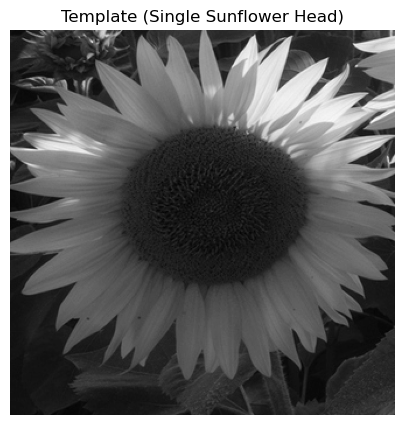

In [ ]:
from skimage import io, color
from skimage.feature import match_template


#1 Load and preprocess the image (convert to grayscale and normalize)
img = io.imread("data/sunflowers.jpg")
img_gray = color.rgb2gray(img).astype(np.float32) / 255.0

#Display img_gray unedited
plt.imshow(img_gray, cmap='gray')

#2: Define the region of interest (ROI) for a single sunflower head
roi_start_y, roi_start_x = 730, 100  # Starting coordinates of the ROI
size = 330
template = img_gray[roi_start_y:roi_start_y+size, roi_start_x:roi_start_x+size]

# Display the template (the ROI)
plt.figure(figsize=(5, 5))
plt.title('Template (Single Sunflower Head)')
plt.imshow(template, cmap='gray')
plt.axis('off')
plt.show()

# 3: Performing template matching to find the sunflower in the image
result = match_template(img_gray, template)
correlation = correlate(img_gray,template)

# Find the location of the highest correlation (best match)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

#4: Plot the original image and mark the best match
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

# Drawing a rectangle around the matched region
rect = plt.Rectangle((x, y), size, size, edgecolor='r', facecolor='none')
plt.gca().add_patch(rect)
plt.subplot(1, 2, 2)
plt.title('Matching Result (Correlation Map)')
plt.imshow(result, cmap='gray')
plt.axis('off')



# Mark the highest correlation point
#plt.plot(x, y, 'ro')  # Red dot at the best match location

plt.tight_layout()
plt.show()

plt.imshow(correlation, cmap='gray')
plt.axis('off')
plt.show()

#5: Check the correctness of the match
print(f"Best match found at location: ({x}, {y})")


---
**Task 4 (medium): Sharpening👩‍💻💡**
This task is about creating filters to sharpen the pixels of an input image, making details look clearer than in the original image. The following filters can be used for image sharpening:

$$
K_1=\frac{1}{9}\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 & 17 & -1 \\
		-1 & -1 & -1
	\end{array}
\right],
K_2=\left[
	\begin{array}{r r r}
		-1 & -1 & -1 \\
		-1 &  9 & -1 \\
		-1 & -1 & -1
	\end{array}
\right]
$$
Notice that in this case the filter values sum to one.
1. Why do sharpen filters contain a single positive value at their centers, which are completely surrounded by negative values? Explain why the filters $K_1$ and $K_2$ lead to sharpening.	

2. Define the above filters as Numpy arrays.

3. Use the filters $K_1$ and $K_2$ to sharpen one of the example images from the Scikit-Image library. Show the two filtered images and compare them with the original input image.

4. Implement the sharpening filter shown below and apply it to the selected image. Reflect on the effects of increasing the size of the sharpening filter. 



$$
\frac{1}{8}
\begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & 2 & 2 & 2 & -1 \\
-1 & 2 & 8 & 2 & -1 \\
-1 & 2 & 2 & 2 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}
$$

---

**Why does k_1 and k_2 lead to sharpening:**
When the middle value is very high and the surroundings are negative we are essentially creating "outliers" by enhancing the difference between neighboring pixels, and enhancing the "middle" pixel.

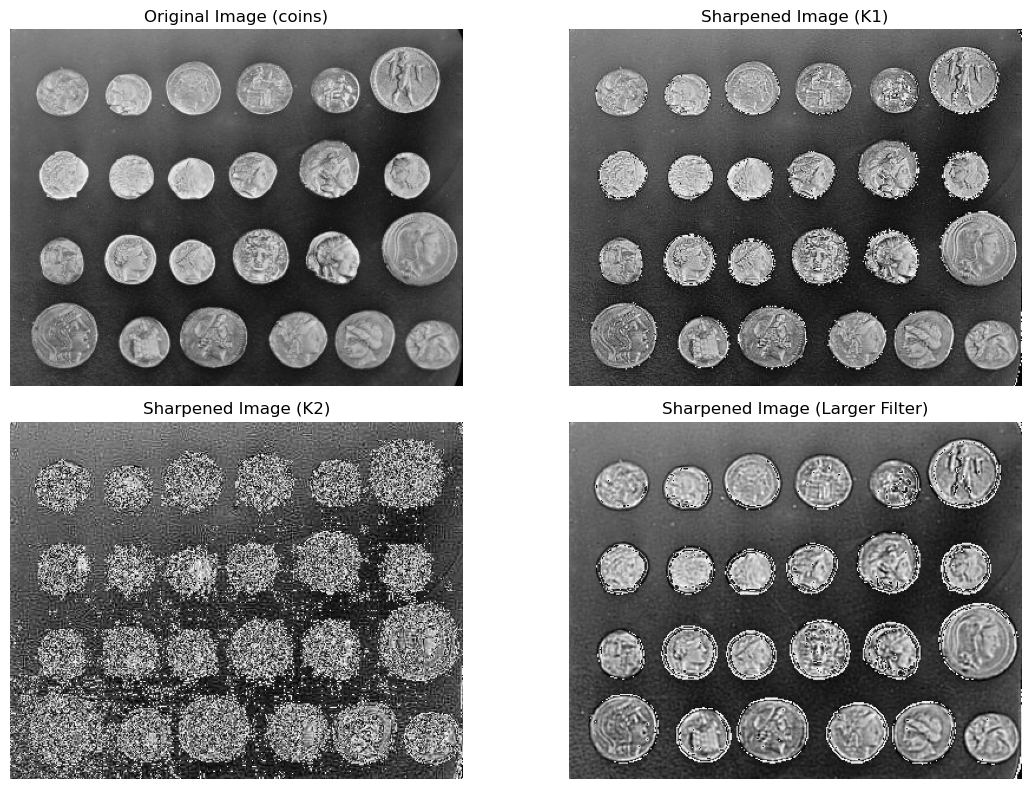

In [ ]:
import numpy as np
from scipy.ndimage import convolve
import matplotlib.pyplot as plt
from skimage import data

image = data.coins()

# Step 2: Define the sharpening filters K1 and K2 as Numpy arrays
K1 = np.array([
    [-1, -1, -1],
    [-1, 17, -1],
    [-1, -1, -1]
]) / 9

K2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

# Step 3: Apply the filters K1 and K2 to the image
sharpened_image_K1 = convolve(image, K1)
sharpened_image_K2 = convolve(image, K2)

# Step 4: Implement the larger sharpening filter
larger_sharpening_filter = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 2, 2, 2, -1],
    [-1, 2, 8, 2, -1],
    [-1, 2, 2, 2, -1],
    [-1, -1, -1, -1, -1]
]) / 8

sharpened_image_larger = convolve(image, larger_sharpening_filter)

# Plot the original and the sharpened images
plt.figure(figsize=(12, 8))

# Original image
plt.subplot(2, 2, 1)
plt.title('Original Image (coins)')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Sharpened with K1
plt.subplot(2, 2, 2)
plt.title('Sharpened Image (K1)')
plt.imshow(sharpened_image_K1, cmap='gray')
plt.axis('off')

# Sharpened with K2
plt.subplot(2, 2, 3)
plt.title('Sharpened Image (K2)')
plt.imshow(sharpened_image_K2, cmap='gray')
plt.axis('off')

# Sharpened with Larger Filter
plt.subplot(2, 2, 4)
plt.title('Sharpened Image (Larger Filter)')
plt.imshow(sharpened_image_larger, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()



---
**Task 5 (medium): Apply sobel filters👩‍💻**
The goal in this task is to construct derivative (sobel) filters in the x and y direction, and apply them to the image by using convolution.
The following steps must be completed: 
1. Constuct the two gradient filters defined by the matrices below:


$$
sobel_x=\left[
	\begin{array}{r r r}
		-1 & 0 & 1 \\
		-2 & 0 & 2 \\
		-1 & 0 & 1
	\end{array}
\right],
sobel_y=\left[
	\begin{array}{r r r}
		-1 & -2 & -1 \\
		0 &  0 & 0 \\
		1 & 2 & 1
	\end{array}
\right]
$$
2. Apply the sobel filters using  `convolve`
 from scipy on the sample image. Run the cell below to display the results.


---

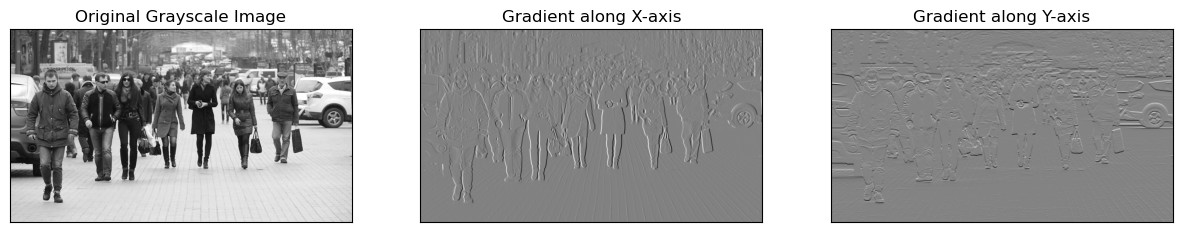

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load the image
fn = "./data/people01.jpg"
image = plt.imread(fn)

def rgb2gray(rgb):
    """Convert RGB image to grayscale
       Parameters:
        rgb : RGB image
       Returns:
        Grayscale image
    """
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Convert the image to grayscale
gray_image = rgb2gray(image)

# Step 1: Construct Sobel filters
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Step 2: Convolve the image with the filters
gradient_x = convolve(gray_image, sobel_x)
gradient_y = convolve(gray_image, sobel_y)

# Step 3: Visualize the original image and gradients with the given subplot template
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.xticks([]), plt.yticks([])  # Hide the tick values on X and Y axis

plt.subplot(1, 3, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient along X-axis')
plt.xticks([]), plt.yticks([])  # Hide the tick values on X and Y axis

plt.subplot(1, 3, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient along Y-axis')
plt.xticks([]), plt.yticks([])  # Hide the tick values on X and Y axis

plt.show()



---
**Task 6 (medium): Implementing convolution👩‍💻**
1. For the previous exercise the `convolve`
 method from scipy was used to apply the filters. This task is about implementing convolution. Below is a breakdown of the `convolve2d`
 function used for performing a 2D convolution operation on an image:
    - Reverse the filter, flipping it both vertically and horizontally, to adhere to the convolution's mathematical definition.

    - Output preparation, create an empty array, the same size as the image, to capture the convolution results.

    - Add zero-padding around the image borders to ensure that the kernel properly processes the edges.

    - Convolution process, iterate over each pixel. For each, apply the kernel, multiply its values with the image segment, and sum the results to assign a new value to the pixel.





---

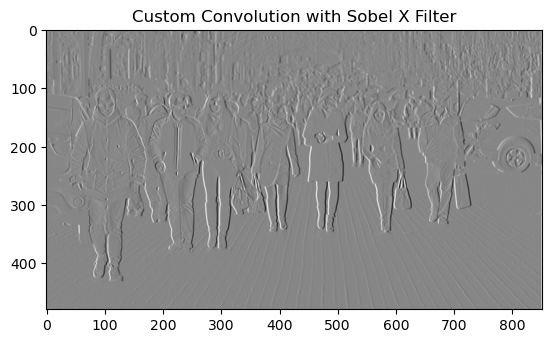

In [ ]:
import numpy as np

def convolve2d(image, kernel):
    """Perform 2D convolution on an image using a given kernel
       Parameters:
        image : 2D array
        kernel : 2D kernel array
       Returns:
        Convolved 2D array
    """
    # Step 1: Reverse the kernel (flip both vertically and horizontally)
    kernel = np.flipud(np.fliplr(kernel))
    
    # Step 2: Prepare the output array
    output = np.zeros_like(image)
    
    # Step 3: Add zero-padding to the image
    image_padded = np.pad(image, pad_width=((kernel.shape[0]//2, kernel.shape[0]//2),
                                            (kernel.shape[1]//2, kernel.shape[1]//2)), mode='constant', constant_values=0)
    
    # Step 4: Perform the convolution
    for i in range(image.shape[0]):  # Loop over every pixel in the image
        for j in range(image.shape[1]):
            # Element-wise multiplication of the kernel and the corresponding image sub-matrix, and summing the result
            output[i, j] = (kernel * image_padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]).sum()
    
    return output

# Example using sobel_x
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

gradient_x_custom = convolve2d(gray_image, sobel_x)

plt.imshow(gradient_x_custom, cmap='gray')
plt.title('Custom Convolution with Sobel X Filter')
plt.show()

# Exam

## All

Applying a filter

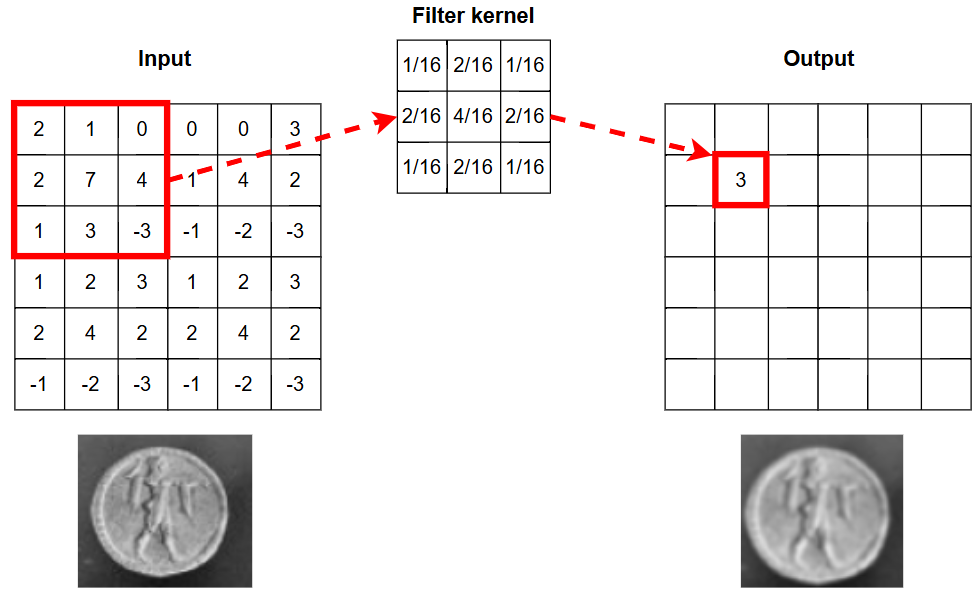

## A: Correlation, convolution blurring/smoothing 

## Correlation

Trying to find (template), in image:

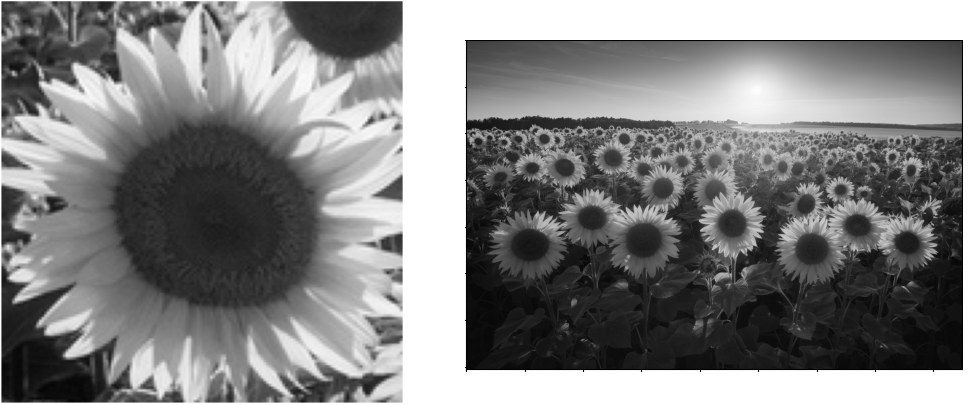


### Using the template as a correlation filter on the full image:

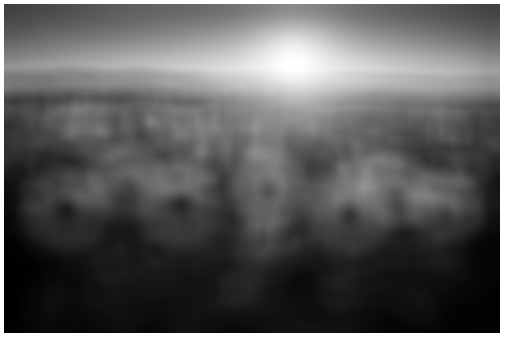


### Using the template in a normalized cross correlation (ncc)

if patch == template, then 
* NCC = patch dot template / ||img_patch||*||template|| = cos(0) = 1
* If angle is 0 then perfect match of 1

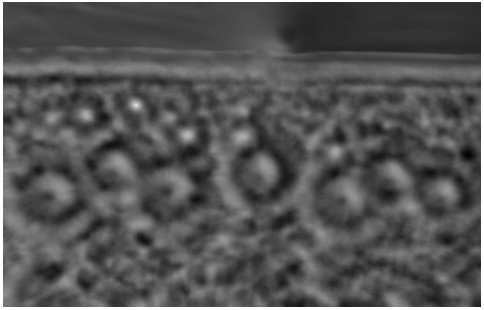

In the image:

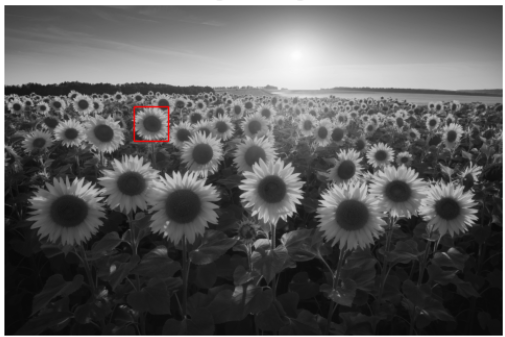

## Convolution

### Blurring

Original image

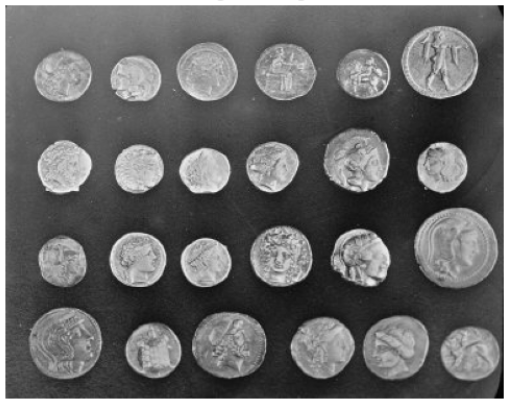

Blurred with gaussian filter:

[1,  4,  6,  4, 1,

4, 16, 24, 16, 4,

6, 24, 36, 24, 6,

4, 16, 24, 16, 4,

1,  4,  6,  4, 1]

/ 256

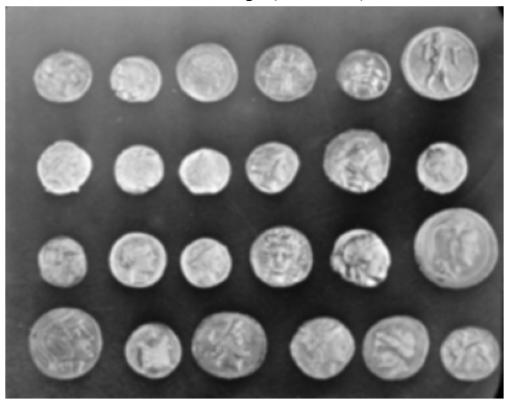

### Gaussian filter on signal

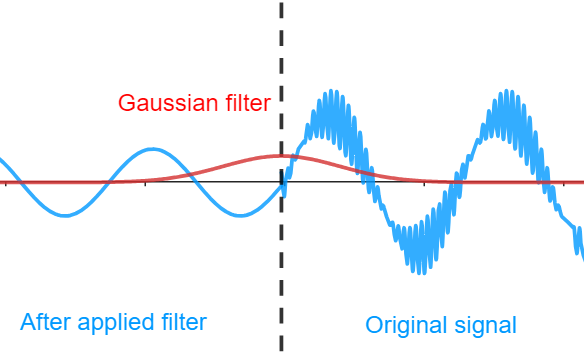

Gaze example

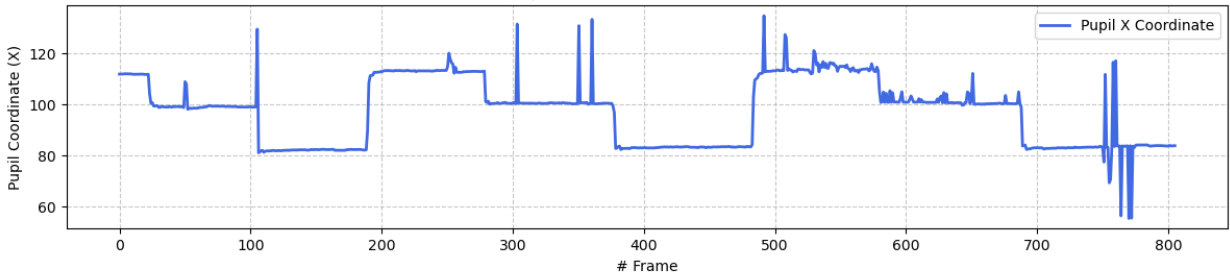

After filter:

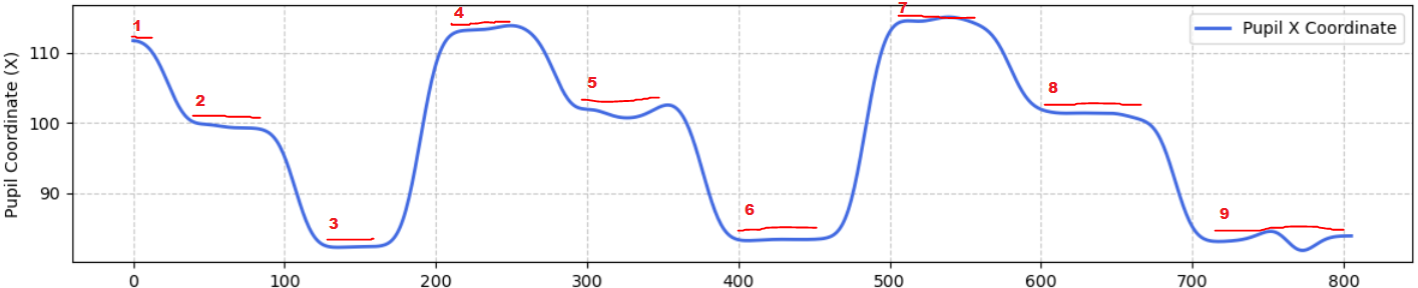

## B: Derivatives, gradiants, edges

## Rul til slutning af spørgsmål A "Gaussian filter on Signal"

### Partial derivative using filter

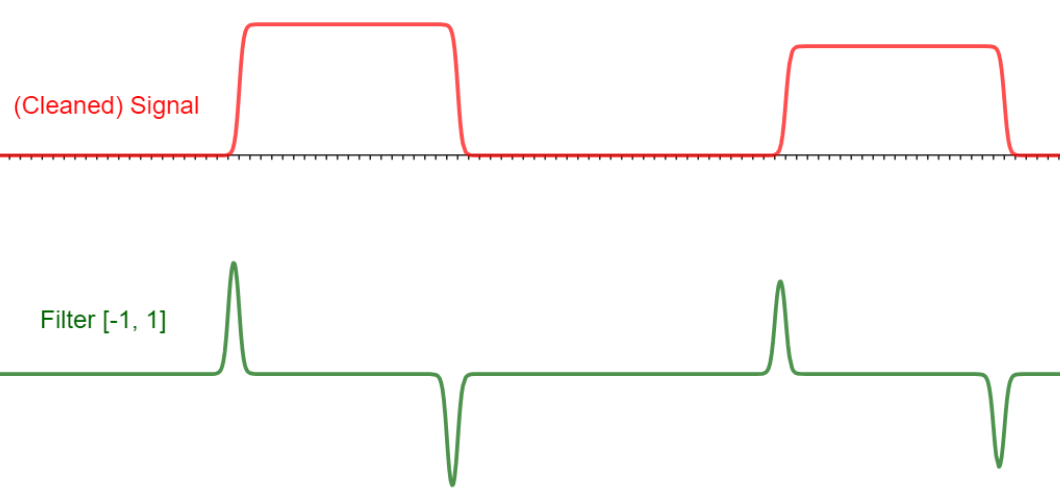

Gaze example

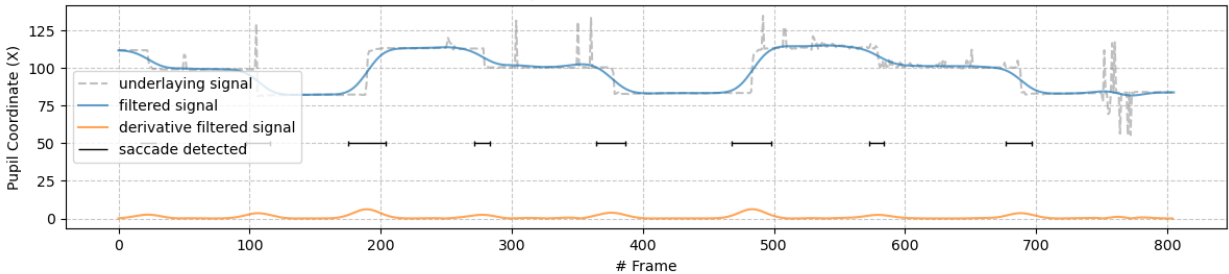

### Gradiants

* f(x,y)
* Gradient: ∇f = [∂f/∂x, ∂f/∂y]
* Gradiants point in direction of most change.
* Magnitude: sqrt(∇f . ∇f)
* Direction: tan^-1(∂f/∂y, ∂f/∂x)

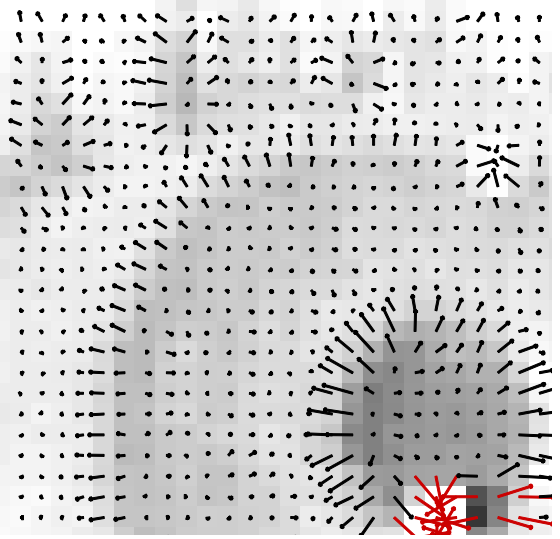

### Hog

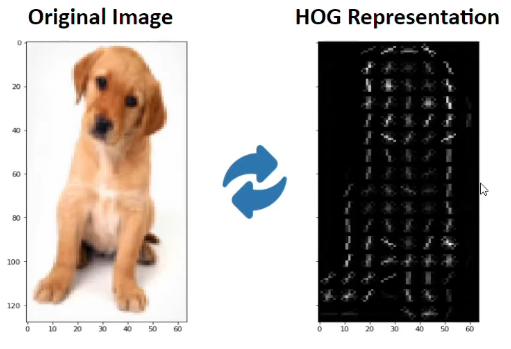

### Edge detection

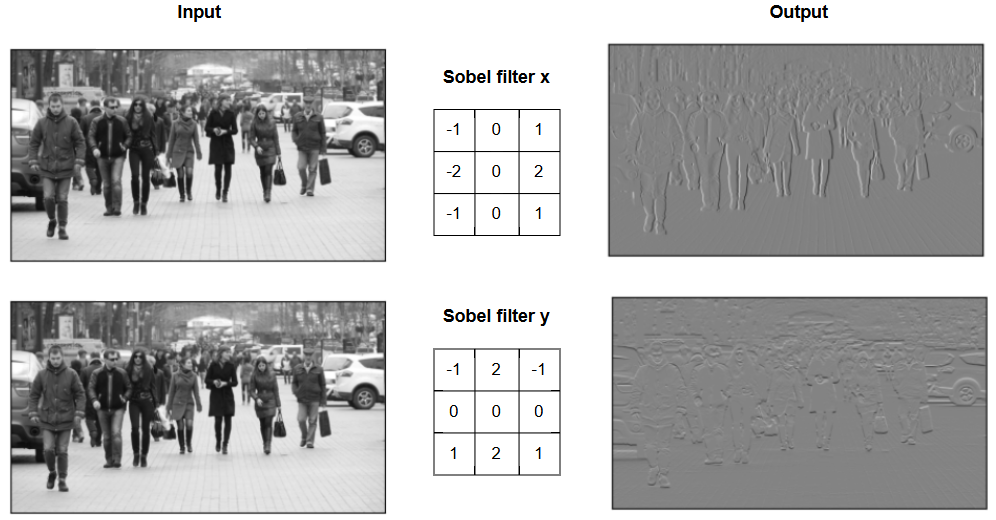


# Week 07 B/D: Noise, data quality, uncertainty

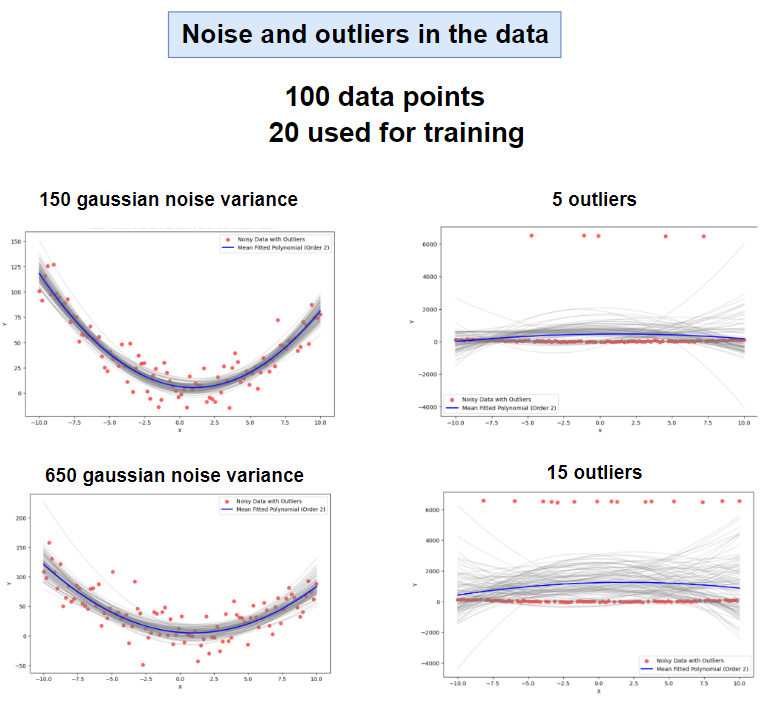

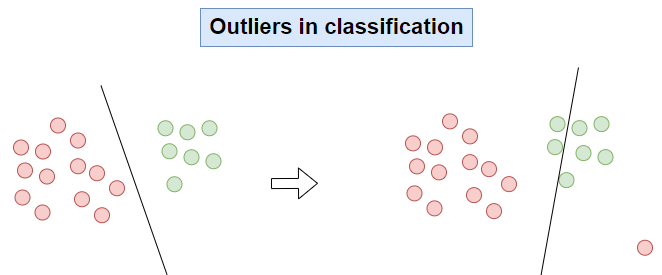

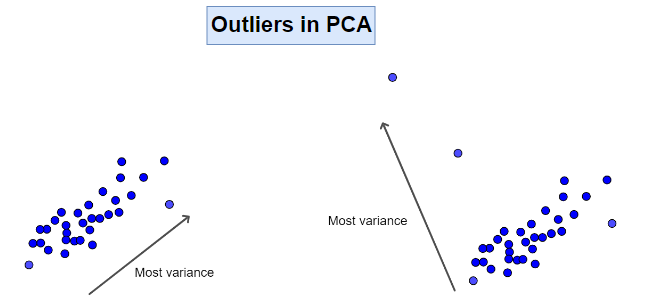

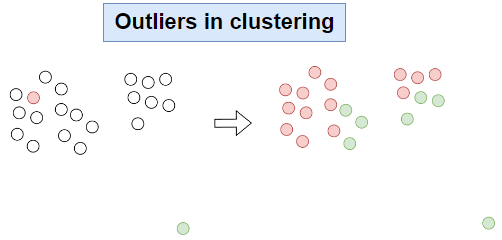

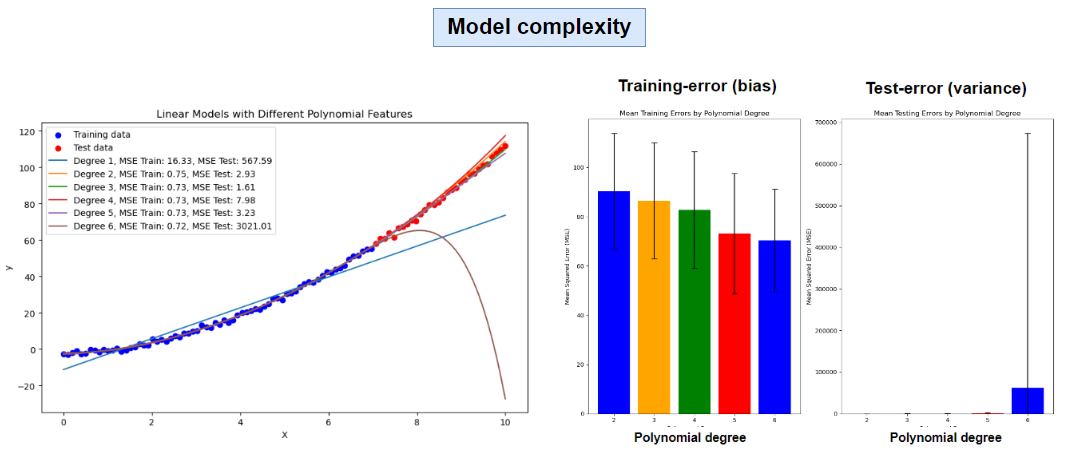

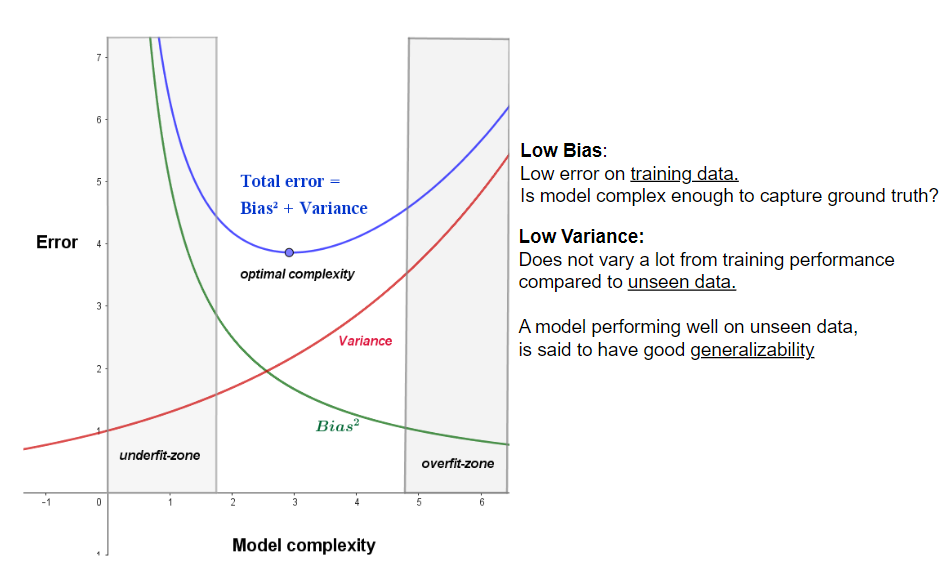

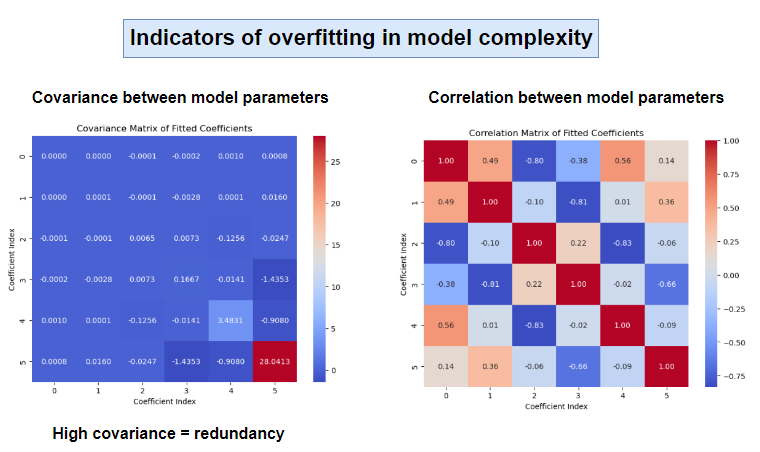

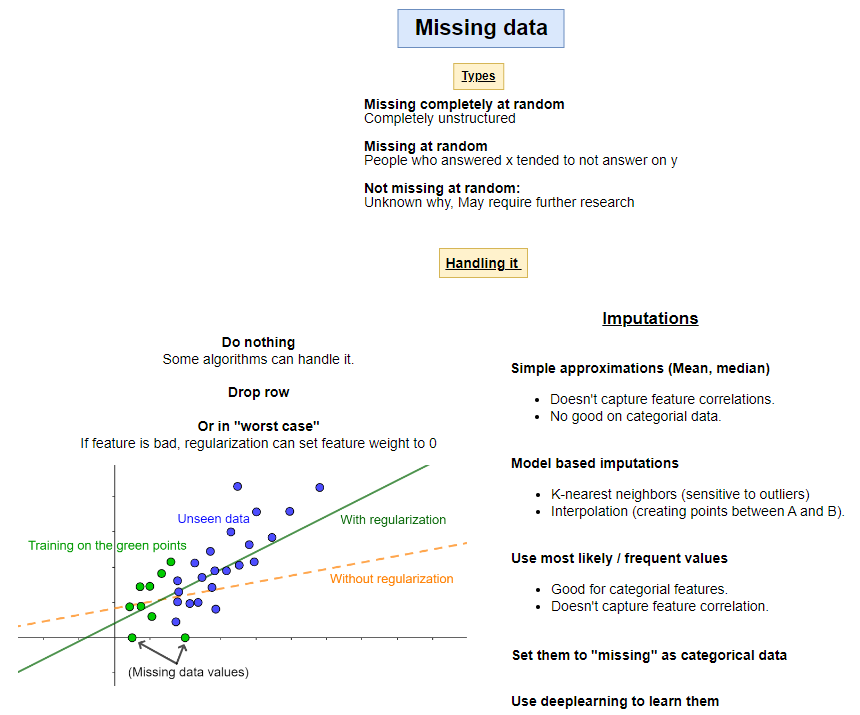

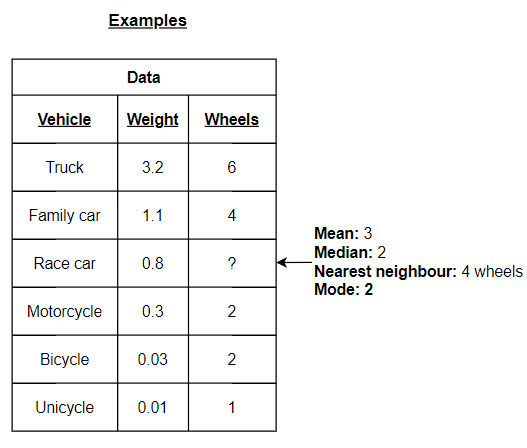